# Sales Prediction In Python

In [172]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [174]:
df = pd.read_csv("C:\\Users\\22271\\Downloads\\advertising (1).csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Data Preprocessing

In [177]:
#checking null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [179]:
df.shape

(200, 4)

In [181]:
# scaling the data based on distribution
df.skew()

TV          -0.069853
Radio        0.094175
Newspaper    0.894720
Sales       -0.073739
dtype: float64

In [183]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# EDA

<Axes: >

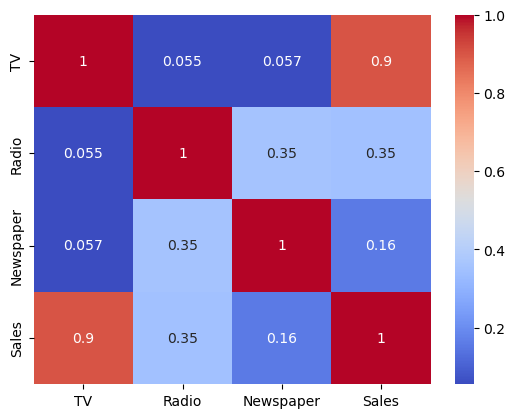

In [186]:
sns.heatmap(df.corr(method='pearson'),annot=True,cmap='coolwarm')

In [187]:
# highly correlated features observed, need to perform pca 

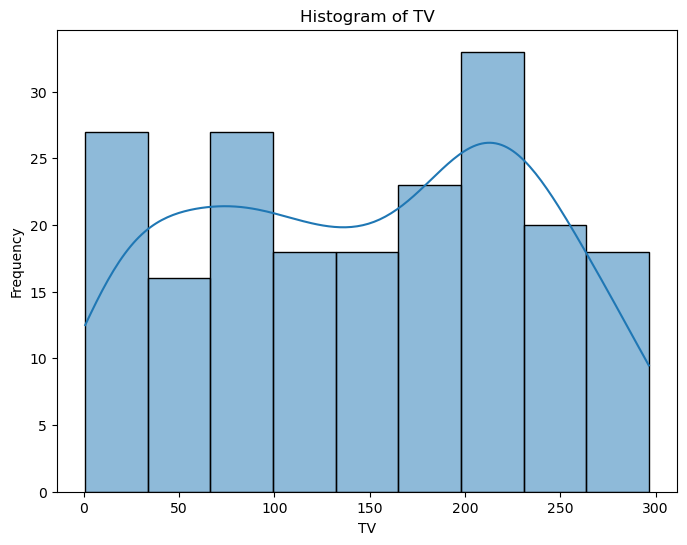

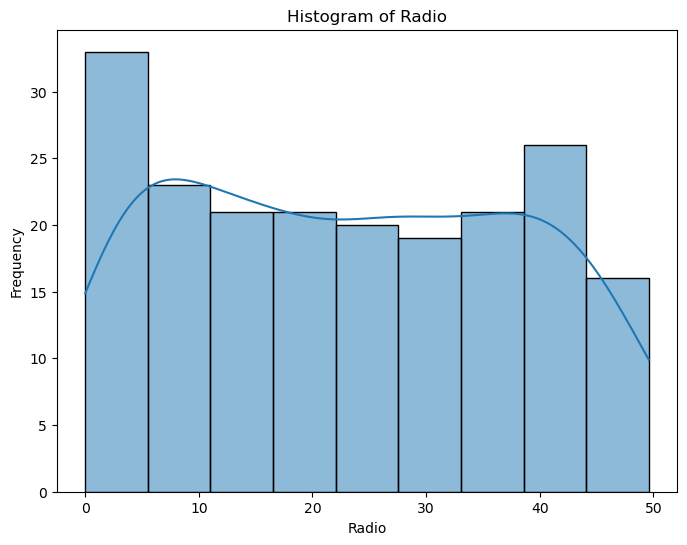

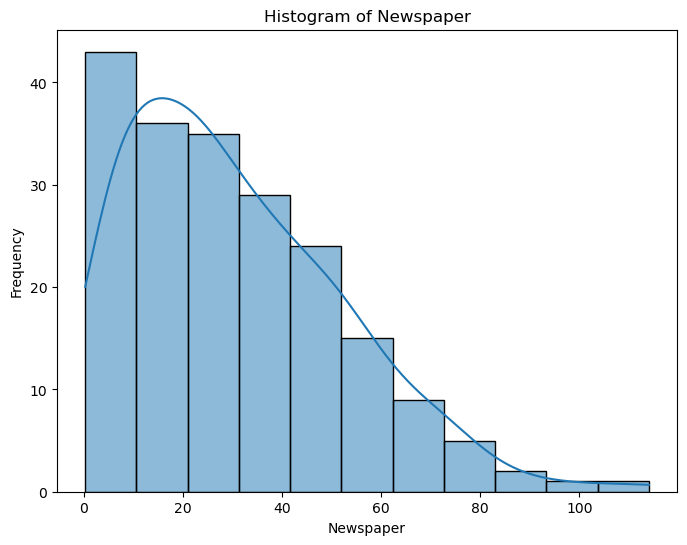

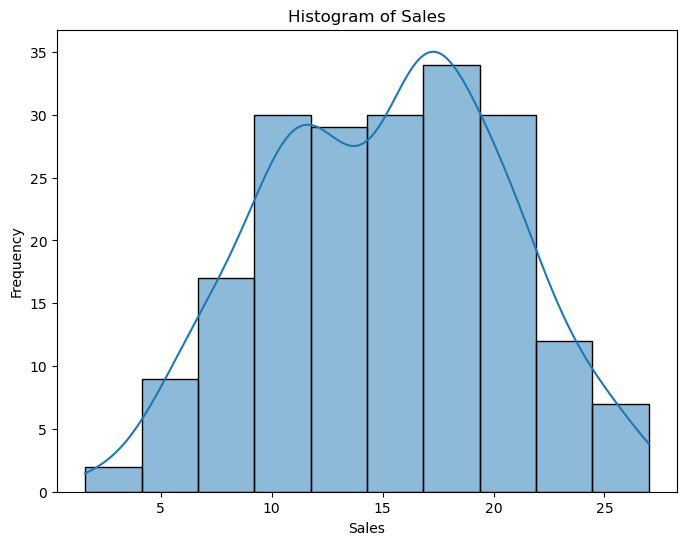

In [188]:
for col in df.columns:
    plt.figure(figsize=(8, 6))  # Create a new figure for each histogram
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')  # Add a title
    plt.xlabel(col)  # Label the x-axis
    plt.ylabel('Frequency')  # Label the y-axis
    plt.show()  # Display the plot

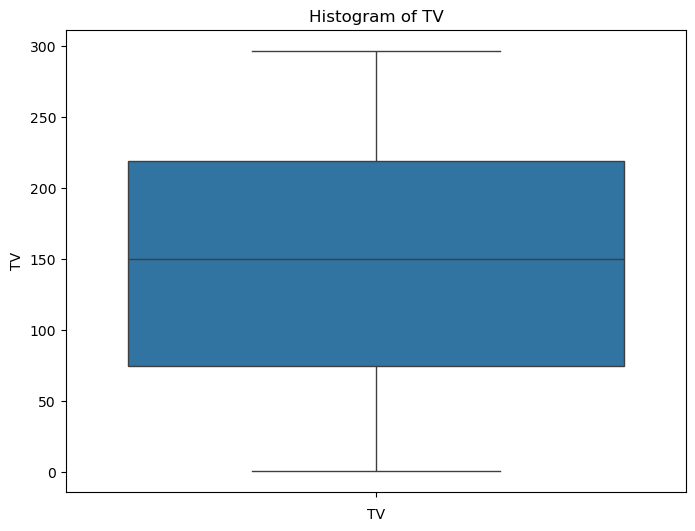

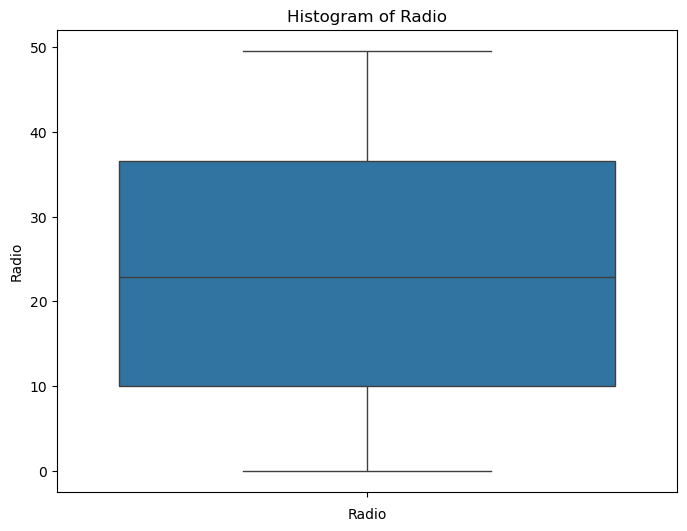

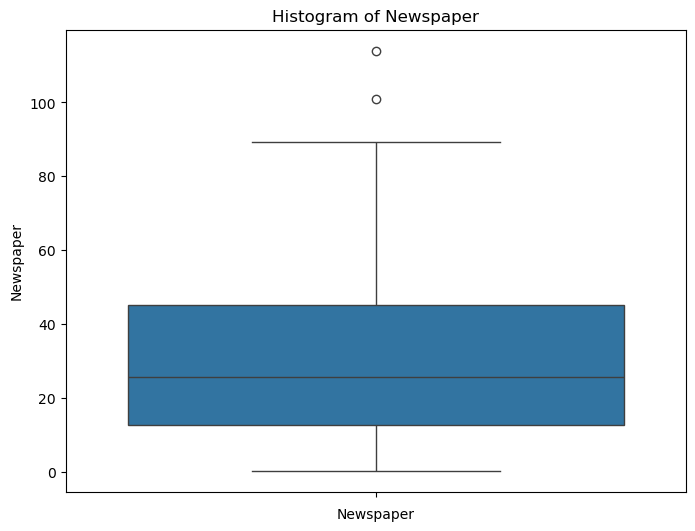

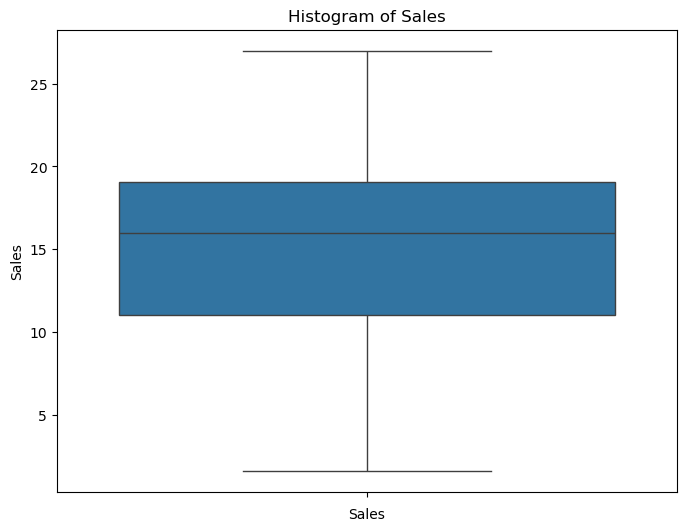

In [191]:
for col in df.columns:
    plt.figure(figsize=(8, 6))  # Create a new figure for each histogram
    sns.boxplot(df[col])
    plt.title(f'Histogram of {col}')  # Add a title
    plt.xlabel(col)  # Label the x-axis
    plt.show()  # Display the plot

# dividing data into input and output

In [193]:
x = df.drop(columns={'Sales'},axis=1)
y=df['Sales']

# split into train and test datasets

In [195]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Feature Engineering

In [197]:
from sklearn.decomposition import PCA # to remove collinearity
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [198]:
pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test=pca.transform(x_test)

Explained variance ratio: [0.4649427  0.33160433]


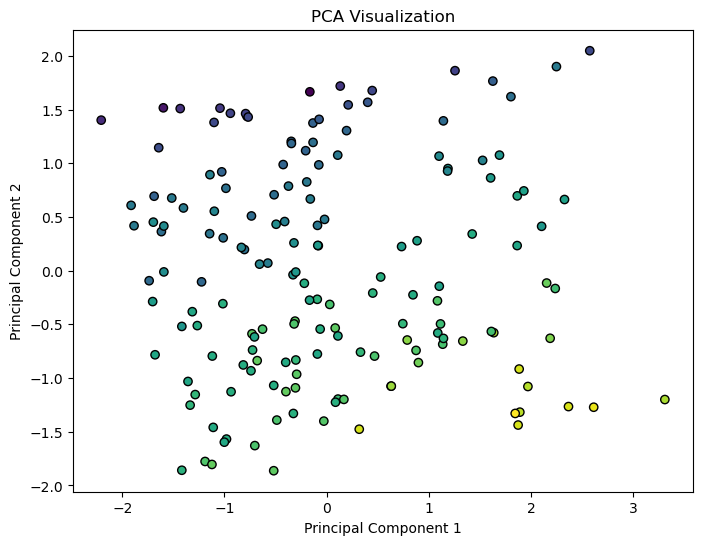

In [199]:
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Step 4: Visualize the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()

# Trainning Linear Regression and RandomForest Models

## 1) Linear Regression

In [202]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
model=LinearRegression(fit_intercept=True)
model.fit(x_train,y_train)

LinearRegression()

In [203]:
y_pred = model.predict(x_test)
print(f'accuracy/r2_score = {r2_score(y_test,y_pred)}')

accuracy/r2_score = 0.8700988864683918


In [204]:
print(f'mse(linear regression) = {mean_squared_error(y_test,y_pred)}')

mse(linear regression) = 4.014087299351577


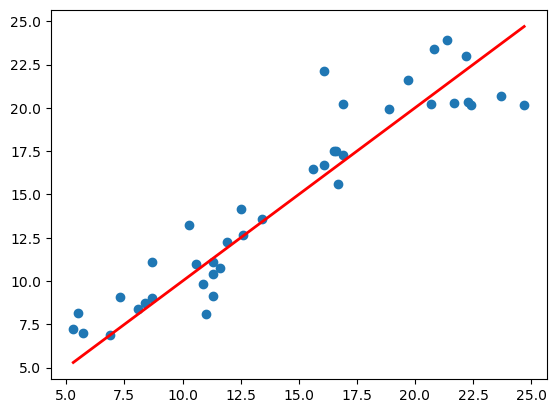

In [269]:
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)

## 2) Decision Tree Regressor

In [206]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor(max_depth=40,min_samples_split=3,min_samples_leaf=5,random_state=42)
model2.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=40, min_samples_leaf=5, min_samples_split=3,
                      random_state=42)

In [207]:
ydt = model2.predict(x_test)
print(f'accuracy/r2_score = {r2_score(y_test,ydt)}')

accuracy/r2_score = 0.8749086696675864


In [255]:
print(f'mse(decision tree regressor) = {mean_squared_error(y_test,ydt)}')

mse(decision tree regressor) = 3.8654597077349466


In [257]:
#Conclusion: thus the sales prediction model was built with an 87.5% accuracy on decision tree

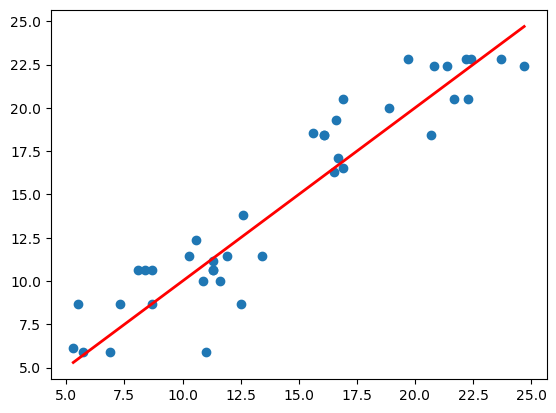

In [267]:
plt.scatter(y_test,ydt)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)

In [ ]:
# conclusion: thus sales prediction model was built with dt 